Nama : San Antonio Limbong

NIM  : 12S19033

### Exercise 1 | Clustering with K-Means
#### Exercise 1.1 | Scratch

In [1]:
# Mengimpor Library
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


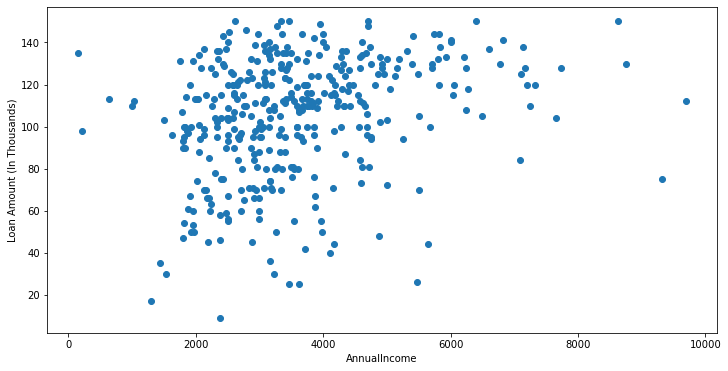

In [3]:
X = data[["ApplicantIncome", "LoanAmount"]]

# Visualisasikan titik data
plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Langkah 1 dan 2 dari K-Means adalah tentang memilih jumlah cluster (k) dan memilih secara acak
centroid untuk setiap cluster. Kami akan memilih 2 cluster dan kemudian memilih pengamatan acak dari data sebagai
centroid.

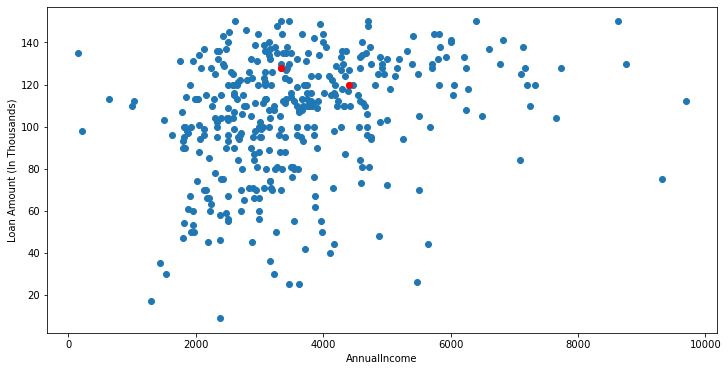

In [4]:
# number of clusters
K=2

# Select random observations as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Di sini, titik merah mewakili 2 centroid untuk setiap cluster. Perhatikan bahwa kami telah memilih poin-poin ini
secara acak dan karenanya setiap kali Anda menjalankan kode ini, Anda mungkin mendapatkan centroid yang berbeda.
Selanjutnya, kita akan mendefinisikan beberapa kondisi untuk mengimplementasikan algoritma K-Means Clustering. Secara khusus, kami
akan menerapkan:
-  Langkah 3 - Tetapkan semua titik ke centroid cluster terdekat
-  Langkah 4 - Menghitung ulang centroid dari cluster yang baru terbentuk
-  Langkah 5 - Ulangi langkah 3 dan 4

In [5]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for indexl, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + \
        (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11480\2988051232.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11480\2988051232.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11480\2988051232.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

136.80289802209285
62.590911244685984
0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11480\2988051232.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11480\2988051232.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11480\2988051232.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

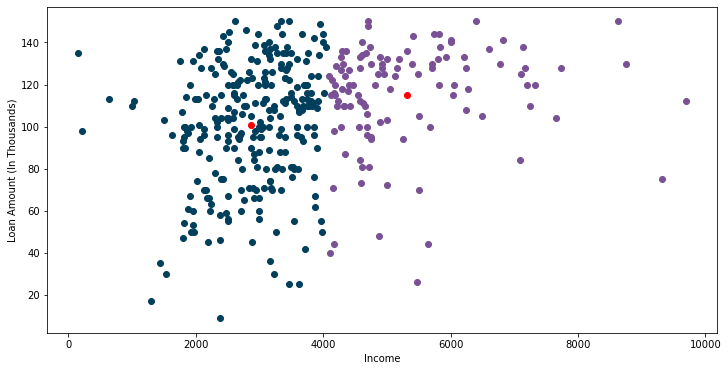

In [6]:
color=['#003f5c','#7a5195']
plt.figure(figsize=(12,6))

for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])
    
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

#### Exercise 1.2 | Using scikit-learn

In [7]:
#Mengimpor Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [8]:
# membaca data dan melihat lima baris pertama dari data
data=pd.read_csv("loan_dataset.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [9]:
sltd_data = data[["ApplicantIncome", "LoanAmount"]]

# statistik dari data
sltd_data.describe()

,ApplicantIncome,LoanAmount
count,381.000000,381.000000
mean,3579.845144,104.986877
std,1419.813818,28.358464
min,150.000000,9.000000
25%,2600.000000,90.000000
50%,3333.000000,110.000000
75%,4288.000000,127.000000
max,9703.000000,150.000000


In [10]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,3.810000e+02,3.810000e+02
mean,9.994921e-17,-9.179009e-17
std,1.001315e+00,1.001315e+00
min,-2.418877e+00,-3.389221e+00
25%,-6.910297e-01,-5.291748e-01
50%,-1.740860e-01,1.770094e-01
75%,4.994218e-01,7.772660e-01
max,4.318317e+00,1.589378e+00


(-4.0, 5.0)

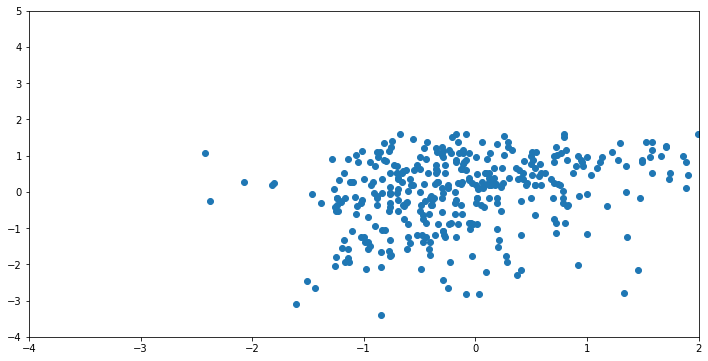

In [11]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

In [12]:
# defining the kmeans function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2)

In [13]:
# save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
# inertia on the fitted data
kmeans.inertia_

453.5681659194928

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'Inertia')

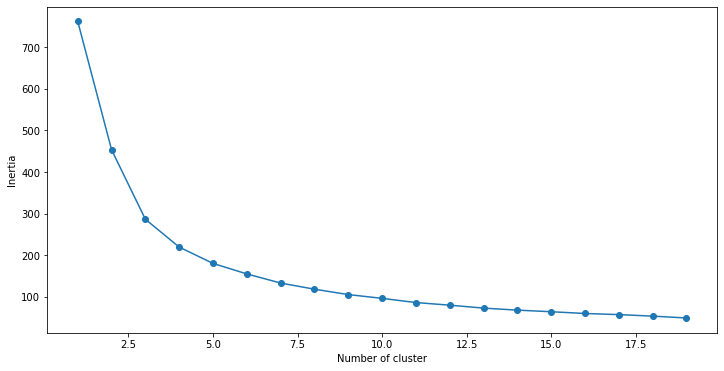

In [15]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE=[]
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')

In [16]:
# k means using 3 clusters and random initialization

kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [17]:
frame  = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    200
1     97
2     84
Name: cluster, dtype: int64

In [18]:
# inertia on the fitted data
kmeans.inertia_

286.5761231062562

In [19]:
# save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(-4.0, 5.0)

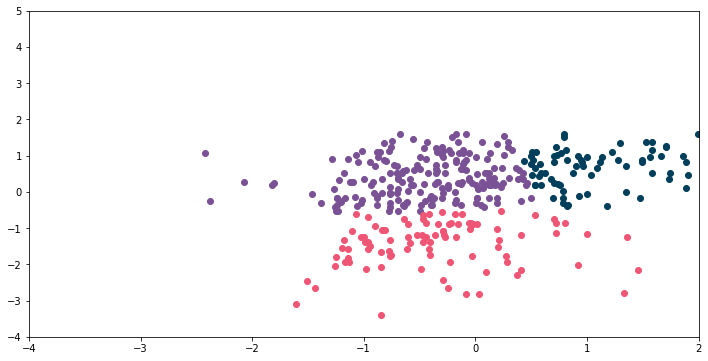

In [20]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km ==0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km ==1,1], c='#7a5195')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km ==2,1], c='#ef5675')
plt.xlim(-4,2)
plt.ylim(-4,5)

#### Exercise 1.3 | Using Elbow Method

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

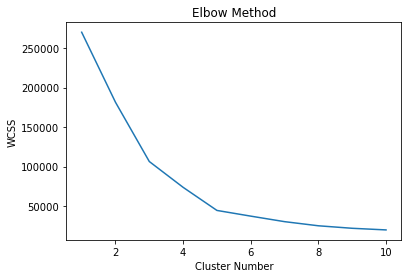

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


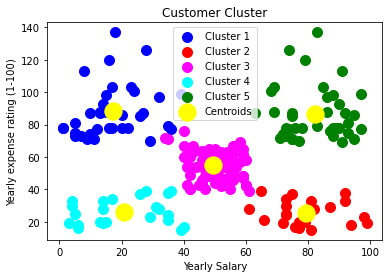

In [22]:
# Mengimpor Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
X = dataset.iloc[:, [3,4]].values

# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.title('Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clusters
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans ==0,1], s = 100, c='blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans ==1,1], s = 100, c='red', label = 'Cluster 2')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans ==2,1], s = 100, c='magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans ==3,1], s = 100, c='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans ==4,0], X[y_kmeans ==4,1], s = 100, c='green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='yellow', label = 'Centroids')
plt.title('Customer Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

### Exercise 2 | Clustering with Hierarchical

#### Exercise 2.1 | Clustering with Agglomerative Nesting (AGNES) Using scikit-learn

In [23]:
# impor hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

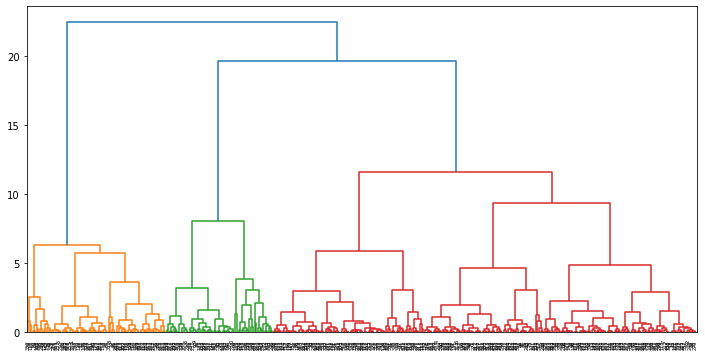

In [24]:
# create dendrogram
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

# create cluster
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# save clusters for chart
y_hc = hc.fit_predict(data_scaled)

(-4.0, 5.0)

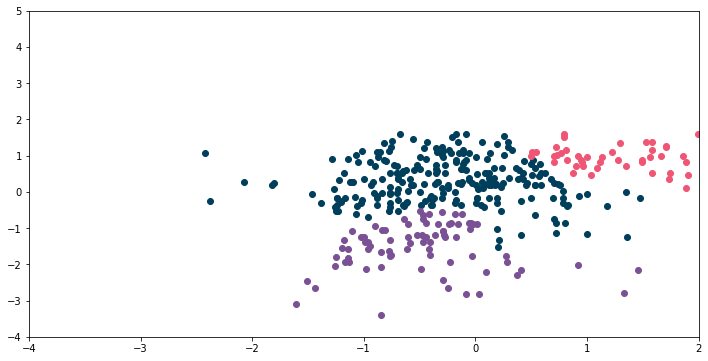

In [25]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_hc ==0,0], data_scaled[y_hc ==0,1], c='#003f5c')
plt.scatter(data_scaled[y_hc ==1,0], data_scaled[y_hc ==1,1], c='#7a5195')
plt.scatter(data_scaled[y_hc ==2,0], data_scaled[y_hc ==2,1], c='#ef5675')
plt.xlim(-4,2)
plt.ylim(-4,5)

#### Exercise 2.2 | Clustering with Hierarchical (Example)

In [26]:
# Mengimpor Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_circles

plt.show()

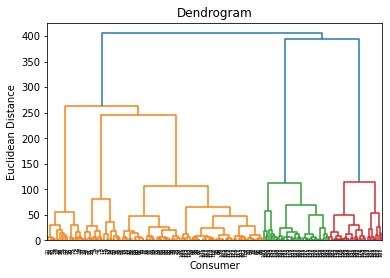

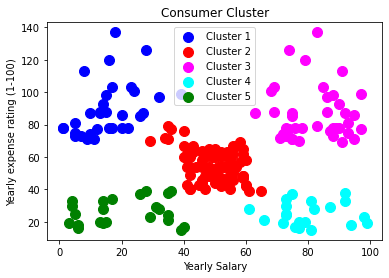

In [27]:
# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
X = dataset.iloc[:, [3,4]].values

# Menggunakan dendogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualisasi hasil clusters
plt.scatter(X[y_hc ==0,0], X[y_hc ==0,1], s = 100, c='blue', label = 'Cluster 1')
plt.scatter(X[y_hc ==1,0], X[y_hc ==1,1], s = 100, c='red', label = 'Cluster 2')
plt.scatter(X[y_hc ==2,0], X[y_hc ==2,1], s = 100, c='magenta', label = 'Cluster 3')
plt.scatter(X[y_hc ==3,0], X[y_hc ==3,1], s = 100, c='cyan', label = 'Cluster 4')
plt.scatter(X[y_hc ==4,0], X[y_hc ==4,1], s = 100, c='green', label = 'Cluster 5')
plt.title('Consumer Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

### Exercise 3 | Clustering with DBSCAN

#### Exercise 3.1 | DBSCAN Non-Spherical Data

Number of clusters: 2
Homogeneity: 0.9999999999999993
Completeness: 0.9441310403045258


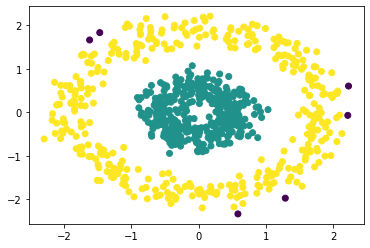

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))

Number of clusters: 3
Homogeneity: 0.9999999999999993
Completeness: 0.7642815491258141
V-measure: 0.866


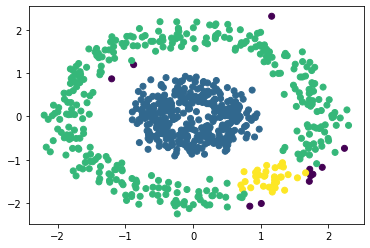

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))

Number of clusters: 3
Homogeneity: 1.0
Completeness: 0.6933569923234916
V-measure: 0.819
Adjusted Rand Index: 0.812
Adjusted Mutual Information: 0.818
Silhouette Coefficient: 0.251


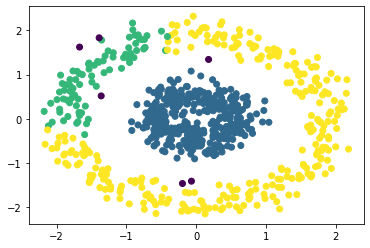

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
print("Adjusted Rand Index: %0.3f" 
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f" 
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f" 
      % metrics.silhouette_score(X, y_pred))

Number of clusters: 11
Homogeneity: 0.9999999999999997
Completeness: 0.382989839118701
V-measure: 0.554
Adjusted Rand Index: 0.560
Adjusted Mutual Information: 0.550
Silhouette Coefficient: 0.295


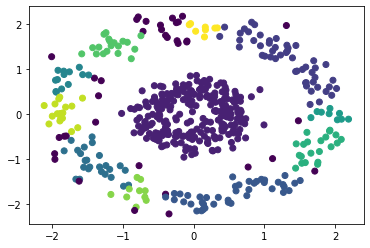

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
print("Adjusted Rand Index: %0.3f" 
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f" 
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f" 
      % metrics.silhouette_score(X, y_pred))

Number of clusters: 2
Homogeneity: 1.0
Completeness: 0.9591493437463376
Adjusted Rand Index: 0.989
Adjusted Mutual Information: 0.979


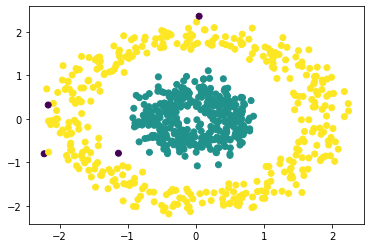

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("Adjusted Rand Index: %0.3f" 
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f" 
      % metrics.adjusted_mutual_info_score(y, y_pred))

Number of clusters: 3
Homogeneity: 0.9929328132995717
Completeness: 0.6941359494150244
V-measure: 0.817


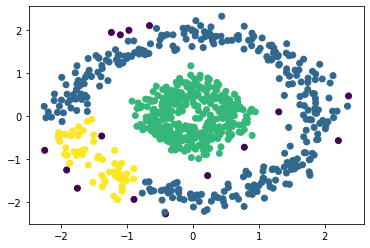

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))

Number of clusters: 2
Homogeneity: 0.9866728483838986
Completeness: 0.9387514337805001
Adjusted Rand Index: 0.982
Adjusted Mutual Information: 0.962
Silhouette Coefficient: 0.184


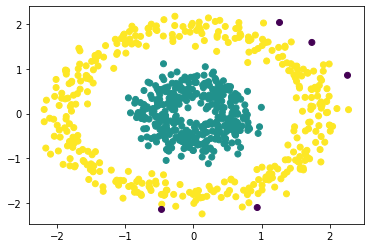

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("Adjusted Rand Index: %0.3f" 
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f" 
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f" 
      % metrics.silhouette_score(X, y_pred))

Number of clusters: 2
Homogeneity: 0.9932184448970924
Completeness: 0.8958383100807044
Adjusted Rand Index: 0.966
Adjusted Mutual Information: 0.942
Silhouette Coefficient: 0.196


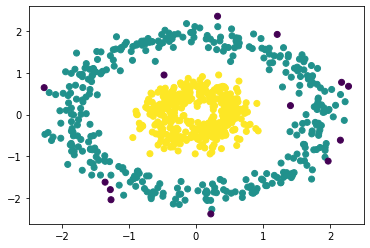

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("Adjusted Rand Index: %0.3f" 
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f" 
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f" 
      % metrics.silhouette_score(X, y_pred))

#### Exercise 3.2 | DBSCAN Spherical Data

In [36]:
# Mengimport Libarary
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

Estimated number of clusters: 3
Estimated number of noise points: 20
Homogeneity: 0.9390052410947328
Completeness: 0.843827004002449
V-measure: 0.889
Adjusted Rand Index: 0.927
Adjusted Mutual Information: 0.888
Silhouette Coefficient: 0.605


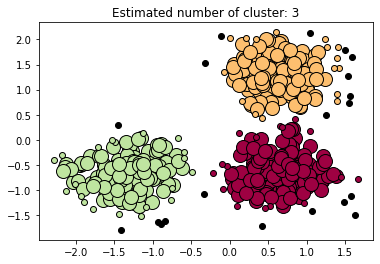

In [37]:
# Generate sample data
centers = [[1,1], [-1,-1], [1,-1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                           random_state=0)

X = StandardScaler().fit_transform(X)

# Menghitung DBSCAN
db= DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Homogeneity: {}'.format(metrics.homogeneity_score(labels_true, labels)))
print('Completeness: {}'.format(metrics.completeness_score(labels_true, labels)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" 
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" 
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" 
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noised instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0,1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        #Black usd for noise
        col = [0,0,0,1]
        
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col),
            markeredgecolor = 'k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col),
            markeredgecolor = 'k', markersize=6)
    
plt.title('Estimated number of cluster: %d' % n_clusters_)
plt.show()

### Tugas

1.Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan 
data set yang diberikan buatlah analisa:

    a. Gunakan kolom ke 2 hingga 4 sebagai input features.
    b. Dengan metode elbow, analisa jumlah cluster yang tepat.
    c. Gunakan K-Means clustering dan analisa hasilnya.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

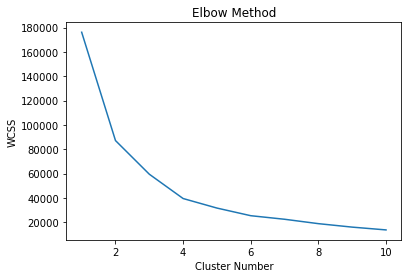

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


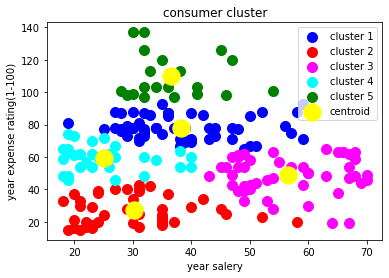

In [38]:
# Terlebih dahulu import semua library ynag dibutuhkan menggunakan K-means dengan metode elbow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Lalu import dan read dataset
dataset = pd.read_csv("./customer.csv")
X = dataset.iloc[:, [2,4]].values

# Disini digunakan metode elbow untuk menentukan jumlah  cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()

# Lalu jalankan K-means clustering sesuai dengan dataset yang ada
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Kemudian visualisasilah cluster, dalam hal ini dilakukan visualiasi dengan scatter plot dengan year salary pada sumbu x dan year expense rating pda sumbu y
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="blue", label ="cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c="red", label ="cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="magenta", label ="cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c="cyan", label ="cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c="green", label ="cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c="yellow", label="centroid")
plt.title("consumer cluster")
plt.xlabel("year salery")
plt.ylabel("year expense rating(1-100)")
plt.legend()
plt.show()


2.Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan 
data set yang diberikan buatlah analisa:

    a. Gunakan kolom ke 2 hingga 4 sebagai input features.
    b. Dengan dendogram diagram, analisa jumlah cluster yang tepat.
    c.Gunakan Hierachical clustering dan analisa hasilnya.
    d.Bandingkan hasilnya dengan menggunakan metode K-Means

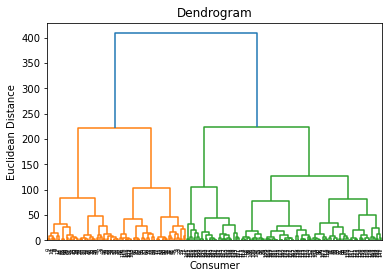

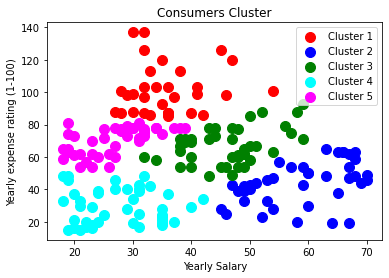

In [39]:
# Pertama import dataset, yakni dataset customer
dataset = pd.read_csv('./Customer.csv')
X = dataset.iloc[:, [2, 4]].values
 
# Dalam hal ini, dendogram diguanakan untuk menentukan jumlah  cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()
 
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
 
# Visualisasi hasil clusters dengan scatter plot, dimana Yearly salary pada sumbu x, dan Yearly expense rating pada sumbu y
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

3.Generate data set sebanyak 500 titik data pelatihan bola dengan label yang sesuai

    a. Lakukan normalisasi fitur pada proses pelatihan data.
    b. Gunakan DBSCAN dari library sklearn.
    c. Buatlah untuk kasus spherical dan non-spherical data.
    d. Pada kasus non-spherical data, uji coba dengan metode K-Means dan bandingkan hasilnya.

Estimated number of clusters: 4
Estimated number of noise points: 108
Homogeneity: 0.583
Completeness: 0.593
V-measure: 0.588
Adjusted Rand Index: 0.458
Adjusted Mutual Information: 0.584
Silhouette Coefficient: 0.304


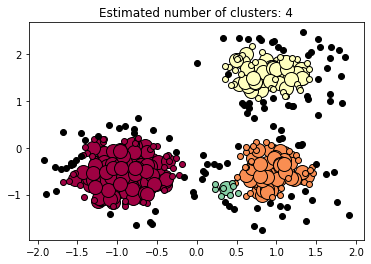

In [40]:
#Mengimport library yang diguankan pada DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Menghasilkan sampel data 
centers = [[1, 1], [-1, -1], [1, -1],  [-1, -1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# menghitung kluster
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Jumlah cluster pada label, abaikan noise data jika ada.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Hasil plot
import matplotlib.pyplot as plt
%matplotlib inline

# Titik hitam menandakan noisy data
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()